### CSE 572: train_data Mining
### Homework 2 - Q1
#### Name: Dev A Patel
#### ASU ID: 1229417087

### 1) Preprocess your Titanic training data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

#### Preprocess train data

In [2]:
train_data = pd.read_csv("train.csv", dtype=str)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [3]:
# Fill missing 'Age' based on median age for each Pclass and Sex combination
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [4]:
# Fill missing 'Embarked' values with the most common port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [5]:
# Fill missing 'Fare' values with median Fare for each Pclass
train_data['Fare'] = train_data.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [6]:
# Drop irrelevant columns
train_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [7]:
# One-hot encode 'Embarked' column
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked", "Pclass"])

In [8]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22,1,0,7.25,False,True,False,False,True,False,False,True
1,1,38,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26,0,0,7.925,True,False,False,False,True,False,False,True
3,1,35,1,0,53.1,True,False,False,False,True,True,False,False
4,0,35,0,0,8.05,False,True,False,False,True,False,False,True


In [9]:
# Create 'FamilySize' feature from 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data['IsAlone'] = np.where(train_data['FamilySize'] == 0, 1, 0)

train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [10]:
scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize']
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])

In [11]:
print(train_data.head())

  Survived       Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0        0 -0.534891 -0.502445       False      True       False       False   
1        1  0.668392  0.786845        True     False        True       False   
2        1 -0.234070 -0.488854        True     False       False       False   
3        1  0.442776  0.420730        True     False       False       False   
4        0  0.442776 -0.486337       False      True       False       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  FamilySize  IsAlone  
0        True     False     False      True    0.385649        0  
1       False      True     False     False    0.385649        0  
2        True     False     False      True   -0.493157        0  
3        True      True     False     False    0.385649        0  
4        True     False     False      True   -0.493157        0  


In [12]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Preprocess test data

In [14]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# Fill missing 'Age' based on median age for each Pclass and Sex combination
test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Embarked' values with the most common port
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' values with median Fare for each Pclass
test_data['Fare'] = test_data.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Drop irrelevant columns
test_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# One-hot encode 'Embarked' column
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked", "Pclass"])

# Create 'FamilySize' feature from 'SibSp' and 'Parch'
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['IsAlone'] = np.where(test_data['FamilySize'] == 0, 1, 0)

test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize']
test_data[numeric_features] = scaler.fit_transform(test_data[numeric_features])

In [16]:
test_data.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,IsAlone
0,0.399451,-0.497071,False,True,False,True,False,False,False,True,-0.553443,1
1,1.359273,-0.511934,True,False,False,False,True,False,False,True,0.105643,0
2,2.511059,-0.463762,False,True,False,True,False,False,True,False,-0.553443,1
3,-0.176442,-0.482135,False,True,False,False,True,False,False,True,-0.553443,1
4,-0.560371,-0.417159,True,False,False,False,True,False,False,True,0.764728,0


### 2) Learn and fine-tune a decision tree model with the Titanic training data, plot your decision tree

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



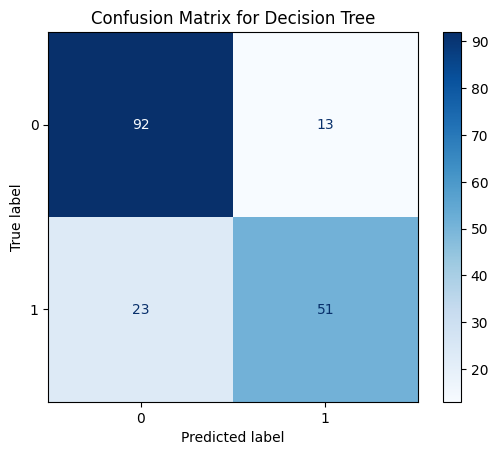

In [17]:
tree_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Evaluate on the validation set
y_pred = best_tree_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_val, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_tree_model, X_val, y_val, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

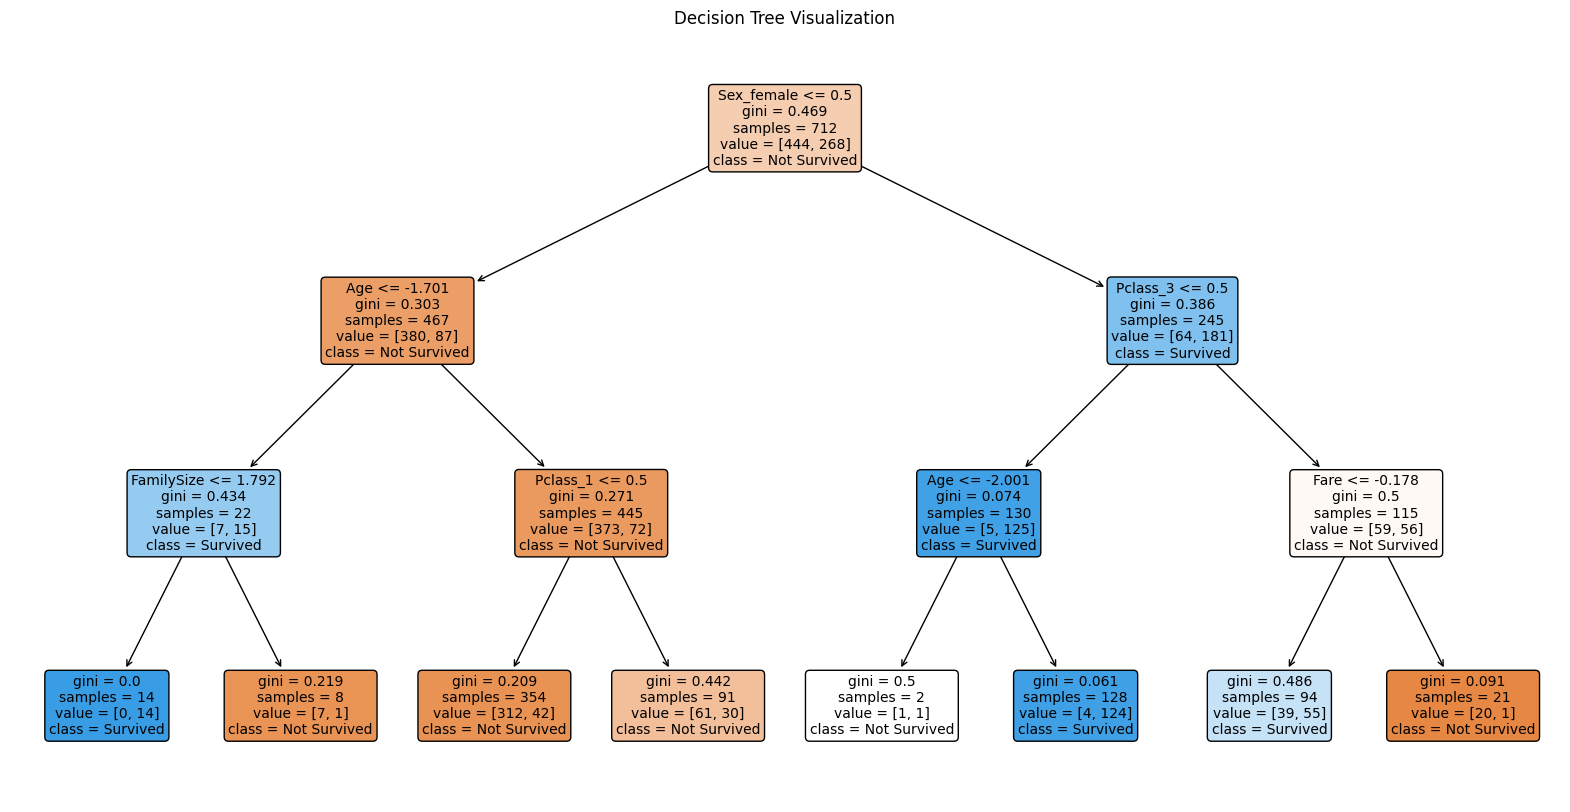

In [18]:
# Plot the Decision Tree with feature names as a list
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree_model, 
    feature_names=list(X.columns),  # Convert to list
    class_names=['Not Survived', 'Survived'], 
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


### 3) Apply the five-fold cross validation of your fine-tuned decision tree learning model to the Titanic training data to extract average classification accuracy

In [19]:
# Compute cross-validation scores for the best decision tree model
cv_scores = cross_val_score(best_tree_model, X, y, cv=5, scoring='accuracy')

# Calculate average classification accuracy
average_accuracy = cv_scores.mean()

average_accuracy

0.8080660347749671

### 4) Apply the five-fold cross validation of your fine-tuned random forest learning model to the Titanic training data to extract average classification accuracy

In [21]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Retrieve the best Random Forest model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on the validation set
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Print results
print("Validation Accuracy:", accuracy)

# Perform five-fold cross-validation on the fine-tuned Random Forest model
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
average_rf_accuracy = rf_cv_scores.mean()

# Output results
print("\n\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("\n\nAverage Cross-Validation Accuracy for Random Forest:", average_rf_accuracy)


Validation Accuracy: 0.8100558659217877


Best Hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Average Cross-Validation Accuracy for Random Forest: 0.8244361272530287
